                                            FITNESS TRACKER E-COMMERCE DATASET

>> Dataset info :
    
    This is a fitness tracker product dataset consisting of different products from various brands with their specifications, ratings and reviews for the Indian market. The data has been collected from an e-commerce website (Flipkart) using webscraping technique.

>> Attribute info :
    
    Brand Name: This indicates the manufacturer of the product (fitness tracker)

    Device Type: This has two categories- FitnessBand and Smartwatch

    Model Name: This indicates the variant/Product Name

    Color: This includes the color of the Strap/Body of the fitness tracker

    Selling Price: This column has the Selling Price or the Discounted Price of the fitness tracker

    Original Price: This includes the Original Price of the product from the manufacturer.

    Display: This categorical variable shows the type of display for the fitness tracker. eg: AMOLED, LCD,OLED, etc.

    Rating (Out of 5): Average customer ratings on a scale of 5.

    Strap Material: Details of the material used for the strap of the fitness tracker.

    Average Battery Life (in days): Quoted average battery life from the manufacturer based on the individual product pages. (It is not the scraped data)

>> Operation Performed :
    
    1. Data Cleaning 
    2. Exploratory data analysis
    3. Feature Selection 
    4. Linear Regression
    5. Lasso Regression 
    6. Ridge Regression
    7. Cross Validation

                                                        PROBLEM STATEMENT 

                    Predicting the selling prices of Fitness trackers based on Various features provided by the brand .

In [437]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [438]:
#downloading  the dataset

import opendatasets as od 

download_url = 'https://www.kaggle.com/datasets/devsubhash/fitness-trackers-products-ecommerce?select=Fitness_trackers.csv'
od.download(download_url)

Skipping, found downloaded files in "./fitness-trackers-products-ecommerce" (use force=True to force download)


In [439]:
#reading the dataset 

df = pd.read_csv('fitness-trackers-products-ecommerce/Fitness_trackers.csv')
df.head(3)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14,NaN


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      565 non-null    object 
 1   Device Type                     565 non-null    object 
 2   Model Name                      565 non-null    object 
 3   Color                           565 non-null    object 
 4   Selling Price                   565 non-null    object 
 5   Original Price                  565 non-null    object 
 6   Display                         565 non-null    object 
 7   Rating (Out of 5)               514 non-null    float64
 8   Strap Material                  565 non-null    object 
 9   Average Battery Life (in days)  565 non-null    int64  
 10  Reviews                         78 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 48.7+ KB


                                                        DATA CLEANING

In [495]:
df = df.rename(columns = {'Rating (Out of 5)' : 'Rating' , 'Average Battery Life (in days)' : 'Avg battery life'})
df.head(1)

,Brand Name,Device Type,Selling Price,Original Price,Display,Rating,Strap Material,Avg battery life,Discount
0,16,0,2499,2999,0,4.1,10,14,16.672224


In [442]:
#check for missing values 

def missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total / len(df)) * 100
    return pd.concat((total , percent) , axis = 1 , keys = ['TOTAL' ,'PERCENT'])

miss_values = missing_values(df)
miss_values

,TOTAL,PERCENT
Reviews,487,86.194690
Rating,51,9.026549
Brand Name,0,0.000000
Device Type,0,0.000000
Model Name,0,0.000000
Color,0,0.000000
Selling Price,0,0.000000
Original Price,0,0.000000
Display,0,0.000000
Strap Material,0,0.000000


In [443]:
#since review column has 85% of missing values we will drop it 

df = df.drop('Reviews' , axis = 1)

#also replacing the rating column missing values with mean of it 

df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [444]:
df.isnull().sum()

Brand Name          0
Device Type         0
Model Name          0
Color               0
Selling Price       0
Original Price      0
Display             0
Rating              0
Strap Material      0
Avg battery life    0
dtype: int64

In [445]:
df.head(1)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating,Strap Material,Avg battery life
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand Name        565 non-null    object 
 1   Device Type       565 non-null    object 
 2   Model Name        565 non-null    object 
 3   Color             565 non-null    object 
 4   Selling Price     565 non-null    object 
 5   Original Price    565 non-null    object 
 6   Display           565 non-null    object 
 7   Rating            565 non-null    float64
 8   Strap Material    565 non-null    object 
 9   Avg battery life  565 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 44.3+ KB


In [447]:
#fixing the datatype of the columns selling price and original price 
#we can observe that there is ',' in the numbers which cant be converted to int directly 

df['Selling Price'] = df['Selling Price'].str.replace(',' , '')
df['Original Price'] = df['Original Price'].str.replace(',' , '')

In [448]:
df[['Selling Price' , 'Original Price']] = df[['Selling Price' , 'Original Price']].astype(int)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand Name        565 non-null    object 
 1   Device Type       565 non-null    object 
 2   Model Name        565 non-null    object 
 3   Color             565 non-null    object 
 4   Selling Price     565 non-null    int64  
 5   Original Price    565 non-null    int64  
 6   Display           565 non-null    object 
 7   Rating            565 non-null    float64
 8   Strap Material    565 non-null    object 
 9   Avg battery life  565 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 44.3+ KB


In [450]:
#check for duplicate values
df[df.duplicated()]

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating,Strap Material,Avg battery life
50,FitBit,Smartwatch,Versa 3,"Black, Blue, Pink",17999,18999,AMOLED Display,4.300000,Elastomer,7
383,APPLE,Smartwatch,Series 6 GPS + Cellular 40 mm Red Aluminium Case,Red,45690,49900,OLED Retina Display,4.500000,Aluminium,1
391,APPLE,Smartwatch,Series 6 GPS 44 mm Blue Aluminium Case,Deep Navy,43900,43900,OLED Retina Display,4.500000,Aluminium,1
512,GARMIN,Smartwatch,Vivomove 3S,Black,19990,25990,AMOLED Display,4.229961,Silicone,14


In [451]:
#dropping duplicates 
df = df.drop_duplicates()

In [452]:
df.head(3)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating,Strap Material,Avg battery life
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14


                                                EXPLORATORY DATA ANALYSIS

>> Top selling brands based on Device type

In [453]:
df['Brand Name'].unique()

array(['Xiaomi', 'OnePlus ', 'FitBit', 'realme', 'Huawei', 'Honor',
       'GOQii', 'Infinix', 'LCARE', 'LAVA', 'Noise', 'Oppo', 'Fastrack',
       'boAt ', 'Noise ', 'huami', 'SAMSUNG ', 'FOSSIL ', 'APPLE',
       'GARMIN '], dtype=object)

In [454]:
df['Brand Name'].value_counts().sort_values(ascending = False).reset_index()

,index,Brand Name
0,FOSSIL,133
1,GARMIN,100
2,APPLE,84
3,FitBit,50
4,SAMSUNG,48
5,huami,36
6,Huawei,26
7,Honor,20
8,Noise,17
9,realme,12


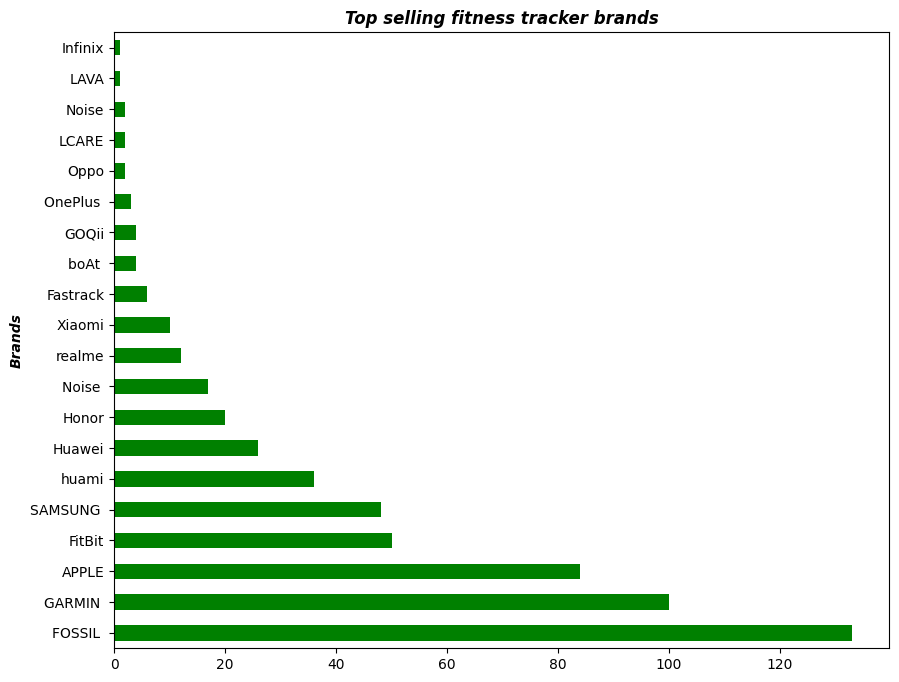

In [455]:
plt.figure(figsize = (10,8))
plt.title('Top selling fitness tracker brands' , weight = 'bold' , style = 'italic')
plt.ylabel('Brands' , weight = 'bold' , style = 'italic')
plt.xlabel('Sales')
df['Brand Name'].value_counts().sort_values(ascending = False).plot(kind = 'barh' , color = 'green')
plt.show()

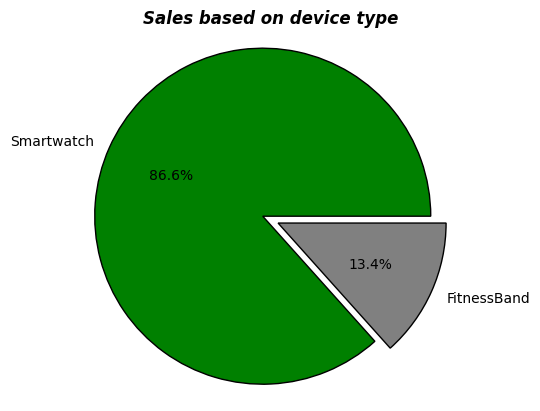

In [456]:
device_type = df['Device Type'].value_counts()
labels = device_type.index
plt.title('Sales based on device type' , weight = 'bold' , style = 'italic')
plt.pie(device_type , autopct="%1.1f%%" , labels = labels , explode = (0.1,0) , wedgeprops = {'edgecolor' : 'black'} , colors = ['green' , 'grey'])
plt.axis('equal')
plt.show()

>> Which brand offers higher battery life ?

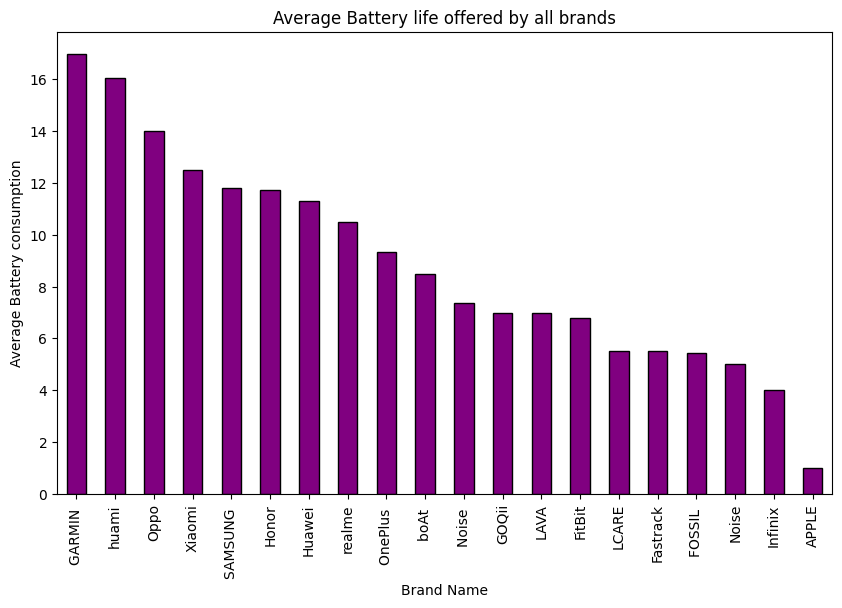

In [457]:
#here we will be calculating the average battery life of all brands and visualizing it 

avg_battery = df.groupby('Brand Name')['Avg battery life'].mean()
plt.figure(figsize = (10 , 6))
plt.ylabel('Average Battery consumption')
plt.title('Average Battery life offered by all brands')
avg_battery.sort_values(ascending = False).plot(kind = 'bar' , color = 'purple' , edgecolor = 'black')
plt.show()

>> Which display type consumes more battery ? 

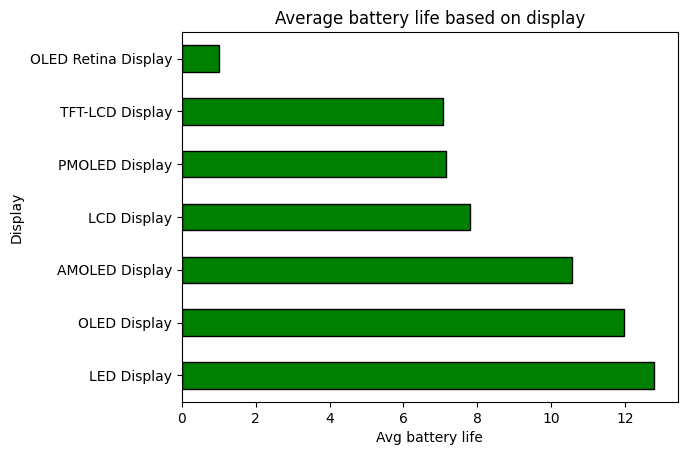

In [458]:
display_battery_life = df.groupby('Display')['Avg battery life'].mean()
display_battery_life.sort_values(ascending = False).plot(kind = 'barh' , color = 'green' , edgecolor = 'black')
plt.xlabel('Avg battery life')
plt.title('Average battery life based on display')
plt.show()

>> Ranking Brand according to customer ratings 

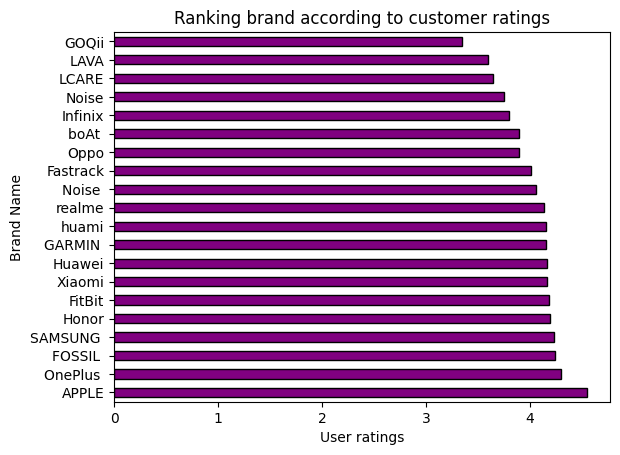

In [459]:
customer_ratings = df.groupby('Brand Name')['Rating'].mean()
customer_ratings.sort_values(ascending = False).plot(kind = 'barh' , color = 'purple' , edgecolor = 'black')
plt.xlabel('User ratings')
plt.title('Ranking brand according to customer ratings')
plt.show()

>> Pricing factor based on brand and display

In [460]:
#checking the correlation between original price based on display and Brand Name

df.groupby('Display')['Original Price'].mean().sort_values(ascending = False).reset_index()

,Display,Original Price
0,OLED Retina Display,51228.095238
1,LED Display,27934.642857
2,OLED Display,23540.325581
3,AMOLED Display,21360.246459
4,LCD Display,15149.950000
5,PMOLED Display,10331.950000
6,TFT-LCD Display,3482.384615


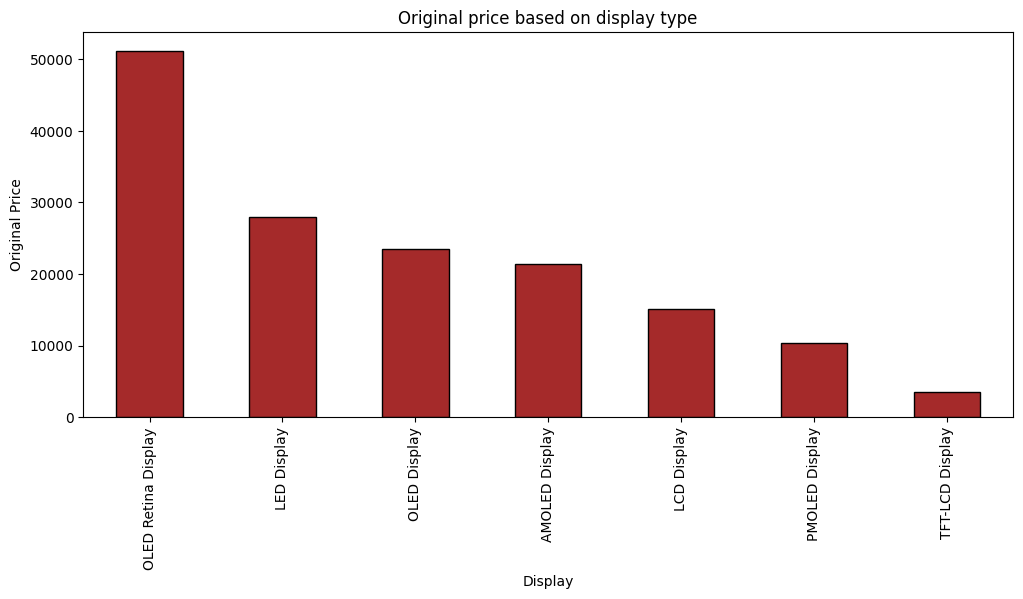

In [461]:
plt.figure(figsize = (12, 5))
plt.title('Original price based on display type')
plt.ylabel('Original Price')
df.groupby('Display')['Original Price'].mean().sort_values(ascending = False).plot(kind = 'bar' , color = 'brown' , edgecolor = 'black')
plt.show()

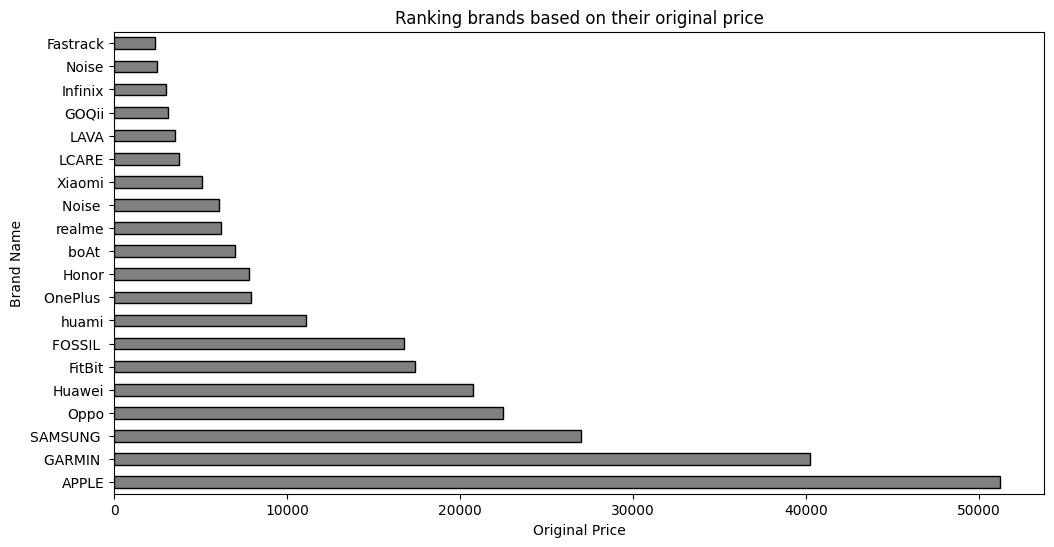

In [462]:
plt.figure(figsize = (12,6))
df.groupby('Brand Name')['Original Price'].mean().sort_values(ascending = False).plot(kind = 'barh' , color = 'grey' , edgecolor = 'black')
plt.title('Ranking brands based on their original price')
plt.xlabel('Original Price')
plt.show()

>> Which brand offers highest amount of discount ?

In [463]:
df.head(2)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating,Strap Material,Avg battery life
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14


In [464]:
# Calculating the discount and adding the column 

discount_amount = df['Original Price'] - df['Selling Price'] 
df['Discount'] = (discount_amount / df['Original Price']) * 100
df.head(3)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating,Strap Material,Avg battery life,Discount
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,16.672224
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,16.006403
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,17.960934


In [465]:
#top 10 brands offering highest number of discount

df.groupby('Brand Name')['Discount'].mean().sort_values(ascending = False)[:10].reset_index()

,Brand Name,Discount
0,Infinix,50.016672
1,Noise,45.957228
2,LAVA,42.869391
3,boAt,41.105362
4,LCARE,38.321266
5,realme,31.509285
6,huami,31.407211
7,Huawei,28.384470
8,Oppo,26.511855
9,Fastrack,26.420207


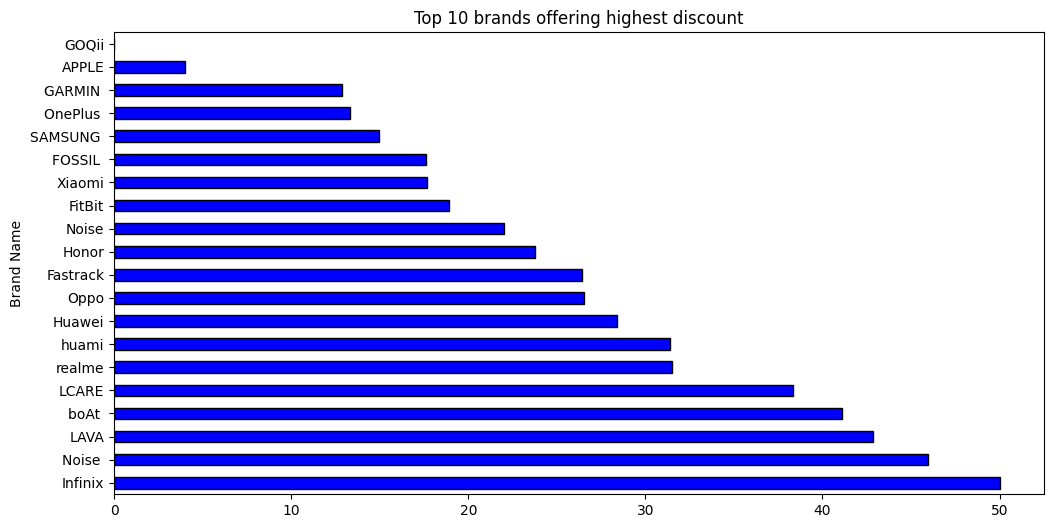

In [466]:
plt.figure(figsize = (12 , 6))
plt.title('Top 10 brands offering highest discount')
plt.xlabel('Discount')
df.groupby('Brand Name')['Discount'].mean().sort_values(ascending = False).plot(kind = 'barh' , color = 'blue' , edgecolor = 'black')
plt.show()

>> Top 10  selling brands

In [467]:
#top 10 selling brands
df['Brand Name'].value_counts().sort_values(ascending = False)[:10].reset_index()

,index,Brand Name
0,FOSSIL,133
1,GARMIN,100
2,APPLE,84
3,FitBit,50
4,SAMSUNG,48
5,huami,36
6,Huawei,26
7,Honor,20
8,Noise,17
9,realme,12


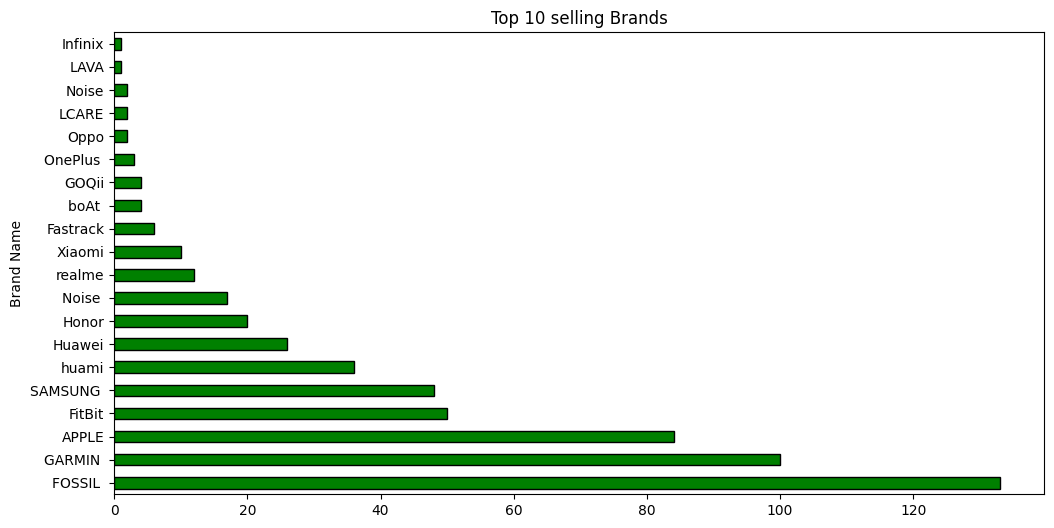

In [468]:
plt.figure(figsize = (12 , 6))
plt.title('Top 10 selling Brands')
plt.ylabel('Brand Name')
plt.xlabel('Sales')
df['Brand Name'].value_counts().sort_values(ascending = False).plot(kind = 'barh' , color = 'green' , edgecolor = 'black')
plt.show()

                                                                MODEL BUILDING

                                                        DEPENDENT VARIABLE - SELLING PRICE

>> Checking for outliers

In [469]:
# Calculate the z-score for each value
z = np.abs(df['Selling Price'] - df['Selling Price'].mean()) / df['Selling Price'].std()

# Identify outliers
outliers = df['Selling Price'][z > 3]
outliers                                                 

419    114900
430    122090
435    122090
463    105990
481     86990
491     81990
504     84490
Name: Selling Price, dtype: int64

<Axes: xlabel='Selling Price', ylabel='Count'>

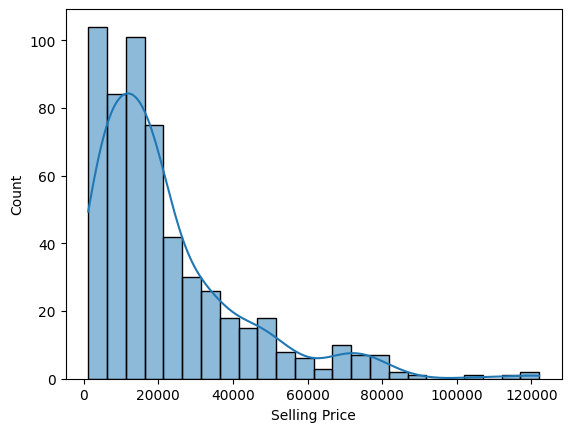

In [470]:
sns.histplot(data = df , x = 'Selling Price' , kde = 'True')

<Axes: >

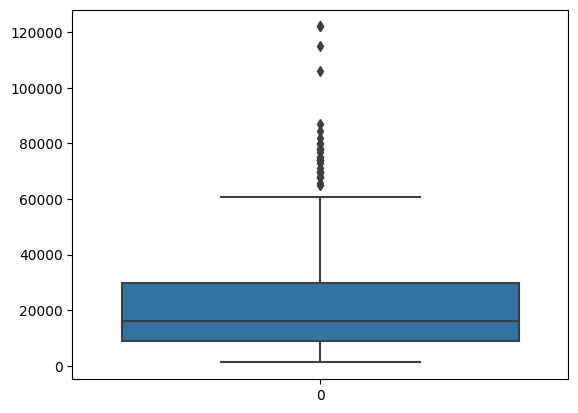

In [471]:
sns.boxplot(df['Selling Price'])

In [472]:
#inspecting each outlier individually

df.loc[[419, 430, 435, 463, 481, 491, 504]]

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating,Strap Material,Avg battery life,Discount
419,APPLE,Smartwatch,42 mm White Ceramic Case with Cloud Sport,Cloud,114900,114900,OLED Retina Display,4.700000,Nylon,1,0.000000
430,APPLE,Smartwatch,Series 3 GPS + Cellular- 42 mm Gray Ceramic Case,Black,122090,122090,OLED Retina Display,4.600000,Nylon,1,0.000000
435,APPLE,Smartwatch,Series 3 GPS + Cellular- 42 mm White Ceramic Case,Black,122090,122090,OLED Retina Display,4.600000,Nylon,1,0.000000
463,GARMIN,Smartwatch,Fenix 6X Solar,"Black, Grey",105990,119490,AMOLED Display,4.229961,Leather,45,11.298017
481,GARMIN,Smartwatch,Fenix 6X,"Bluw, White",86990,96390,OLED Display,4.229961,Leather,45,9.752049
491,GARMIN,Smartwatch,Fenix 6 Sapphire Titanium,Blue Sapphire,81990,96690,AMOLED Display,4.229961,Leather,45,15.203227
504,GARMIN,Smartwatch,Fenix 6 Pro Solar,Yellow,84490,88490,AMOLED Display,4.229961,Nylon,45,4.520285


So according to the above search the data points considered as outlier is justifiable since apple & garmin watches have high selling prices which i have
personally verified according to their websites . Hence we will not be removing these outliers

In [473]:
#lets check whether selling price is dependent on color . if not we will drop the column

from scipy.stats import f_oneway

result_anova = f_oneway(*[df[df['Color'] == color]['Selling Price'] for color in df['Color'].unique()])
print(result_anova.statistic)
print(result_anova.pvalue)

2.774948852213334
6.240498412662972e-16


In [474]:
#since pvalue is greater than 0.05 ( our chosen significance value) there is no relation between selling price and color

df = df.drop(['Model Name' , 'Color'] , axis = 1)

In [475]:
#dropping unncessary columns
df.head()

,Brand Name,Device Type,Selling Price,Original Price,Display,Rating,Strap Material,Avg battery life,Discount
0,Xiaomi,FitnessBand,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,16.672224
1,Xiaomi,FitnessBand,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,16.006403
2,Xiaomi,FitnessBand,1722,2099,LCD Display,3.5,Leather,14,17.960934
3,Xiaomi,FitnessBand,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,17.672558
4,Xiaomi,FitnessBand,1799,2199,OLED Display,4.3,Plastic,7,18.190086


In [476]:
df['Display'].unique()

array(['AMOLED Display', 'LCD Display', 'OLED Display', 'PMOLED Display',
       'LED Display', 'TFT-LCD Display', 'OLED Retina Display'],
      dtype=object)

                                                        ENCODING 

In [477]:
#Encoding Device type to 0 & 1

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Device Type'] = encoder.fit_transform(df['Device Type'])

In [478]:
#Encoding Display type

df['Display'] = encoder.fit_transform(df['Display'])

In [479]:
#encoding the strap material 

df['Strap Material'] = encoder.fit_transform(df['Strap Material'])

In [480]:
#encoding the brand name 

df['Brand Name'] = encoder.fit_transform(df['Brand Name'])

In [481]:
df.head(3)

,Brand Name,Device Type,Selling Price,Original Price,Display,Rating,Strap Material,Avg battery life,Discount
0,16,0,2499,2999,0,4.1,10,14,16.672224
1,16,0,2099,2499,0,4.2,10,14,16.006403
2,16,0,1722,2099,1,3.5,3,14,17.960934


                                                        MODEL TRAINING 

In [482]:
#splitting the dataset to independent and dependent features

x = df[['Brand Name', 'Device Type', 'Original Price','Display', 'Rating', 'Strap Material', 'Avg battery life']]
y = df['Selling Price']

In [483]:
# test train split 

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.25 , random_state = 42)
x_train.shape , x_test.shape

((420, 7), (141, 7))

In [484]:
#Feature scaling - Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [485]:
x_train_scaled

array([[-0.74006788,  0.34208373, -0.37607772, ..., -0.06140979,
         0.82519356, -0.99093023],
       [-0.90444044,  0.34208373,  2.30305025, ...,  0.97353665,
         0.82519356, -0.99093023],
       [-0.90444044,  0.34208373,  1.16669961, ...,  1.23227325,
         0.82519356, -0.99093023],
       ...,
       [-0.74006788,  0.34208373, -0.20683401, ..., -0.06140979,
         0.82519356, -0.86511684],
       [-0.90444044,  0.34208373,  1.86785214, ...,  0.97353665,
         0.82519356, -0.99093023],
       [ 2.21863818,  0.34208373, -0.93197078, ..., -0.57888301,
         0.52090796, -0.23604989]])

/tmp/ipykernel_100/2276288266.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train after scaling')

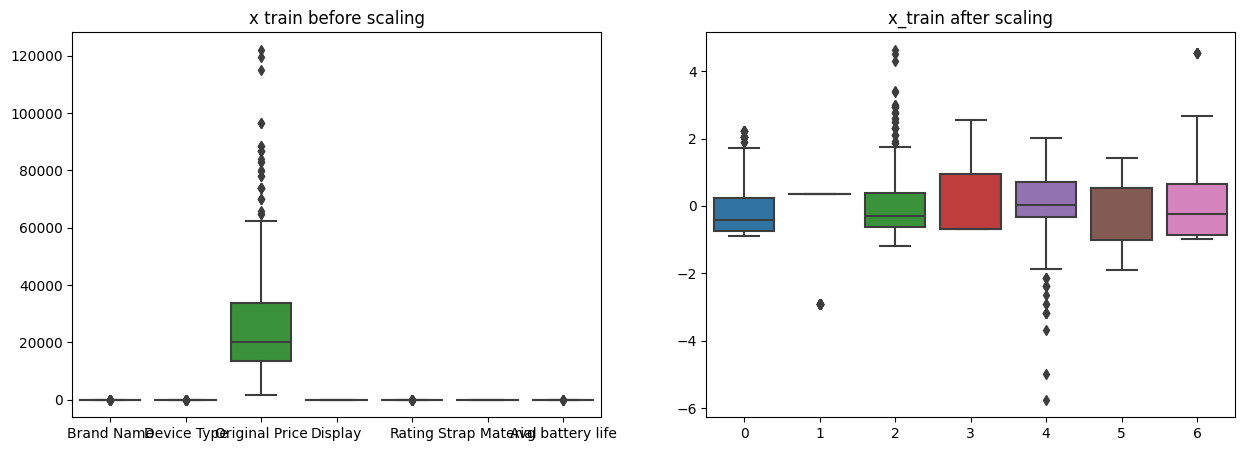

In [486]:
#let us plot a boxplot to understand the transformation of the data after standardization

plt.subplots(figsize=(15 , 5))

plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('x train before scaling')

plt.subplot(1 ,2 , 2)
sns.boxplot(data = x_train_scaled)
plt.title('x_train after scaling')

                                                        LINEAR REGRESSION

In [487]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score

regression = LinearRegression()
regression.fit(x_train_scaled , y_train)
y_pred = regression.predict(x_test_scaled)

mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print("mean absolute error" , mae)
print('r2 score ' , r2)

mean absolute error 2924.040624038938
r2 score  0.966142020098012


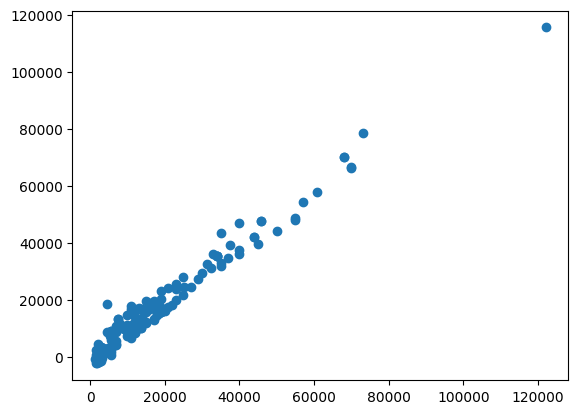

In [488]:
#visualizing in a graph 

plt.scatter(y_test , y_pred)

Since the graph is linear & r2 score is 96% , the model prediction is very good .

                                                    LASSO REGRESSION

In [489]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train_scaled , y_train)
y_pred1 = lasso.predict(x_test_scaled)

mae1 = mean_absolute_error(y_pred1 , y_test)
r21 = r2_score(y_pred1 , y_test)

print('mean absolute error :' , mae)
print('r2 score :' , r21)

mean absolute error : 2924.040624038938
r2 score : 0.965869741779753


                                                    LASSO CROSS-VALIDATION

In [490]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 2902.314230674497
R2 Score 0.9664503927152817


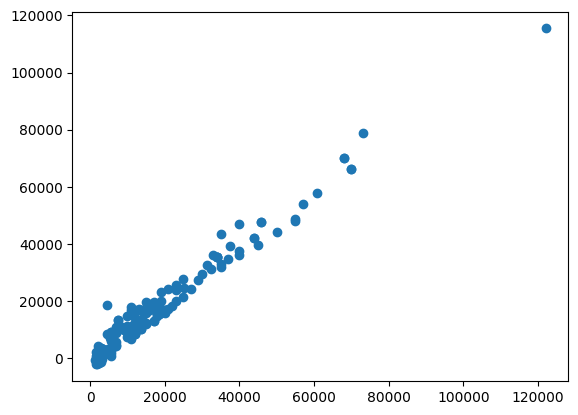

In [491]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

                                                            RIDGE REGRESSION

In [492]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error , r2_score

Ridge = Ridge()
Ridge.fit(x_train_scaled , y_train)
y_pred = Ridge.predict(x_test_scaled)

mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_test, y_pred)

print("mean absolute error " ,mae)
print("r2 score " , r2)

mean absolute error  2931.2488724645145
r2 score  0.9659504230790583


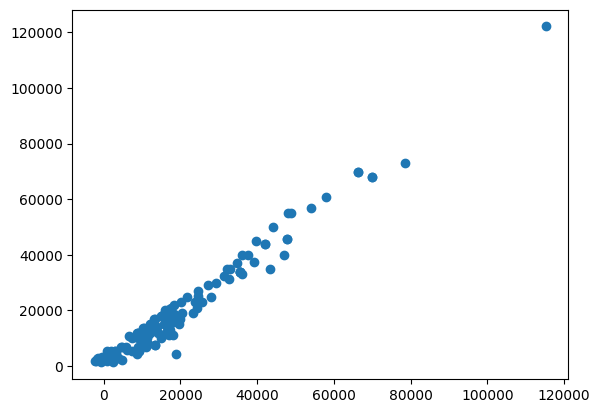

In [493]:
plt.scatter(y_pred , y_test)

                                                    RIDGE REGRESSION CROSS-VALIDATION

Mean absolute error 2924.7749257247756
R2 Score 0.9661237463344605


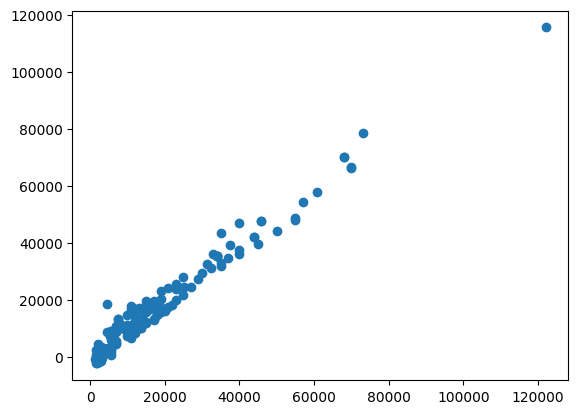

In [494]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

                                                                    CONCLUSION


>> Our analysis has yielded impressive results , with r square scores of 98% for both linear and Lasso regression & 96% for Ridge regression. These high scores indicate that our models have effectively captured the variation in the target variable showcasing their strong predictive capabilities .

>> While these results are promising , its essential to interpret them cautiously and consider potential factors such as overfitting & model complexity

>> Moving forward further validation , hyper parameter tuning & model interpretation will enhance the robustness & applicability of our regression model
in real world scenarios.